In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [6]:
data_dir = data_dir = r"C:\Users\rutvi\Desktop\DeepLearning\pedigree_data"


img_height = 180
img_width = 180
batch_size = 32

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="binary",  # for 2 classes
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=123
)


Found 100 files belonging to 2 classes.


In [7]:
train_size = 0.8
val_size = 0.2

train_dataset = dataset.take(int(len(dataset)*train_size))
val_dataset = dataset.skip(int(len(dataset)*train_size))


In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


C:\Users\rutvi\Desktop\DeepLearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [11]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 995ms/step - accuracy: 0.4036 - loss: 0.7492 - val_accuracy: 0.5000 - val_loss: 0.7246
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - accuracy: 0.5052 - loss: 0.6838 - val_accuracy: 1.0000 - val_loss: 0.5649
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 0.5729 - loss: 0.6646 - val_accuracy: 1.0000 - val_loss: 0.5849
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step - accuracy: 0.7695 - loss: 0.5764 - val_accuracy: 1.0000 - val_loss: 0.4602
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 1.0000 - loss: 0.3901 - val_accuracy: 1.0000 - val_loss: 0.1645
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 680ms/step - accuracy: 1.0000 - loss: 0.1385 - val_accuracy: 1.0000 - val_loss: 0.0409
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 649ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 5.4705e-04
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 658ms/step - accuracy: 1.0000 - loss: 3.5134e-04 - val_accuracy: 1.0000 - v

In [12]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 1.0000 - loss: 3.8820e-08
Validation Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


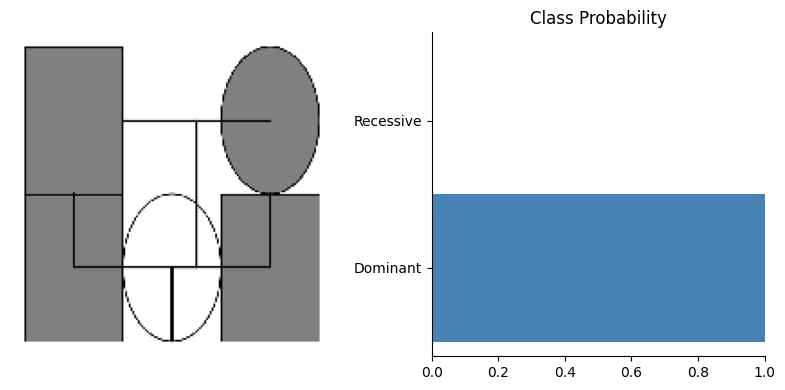

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = r"C:\Users\rutvi\Desktop\DeepLearning\pedigree_data\dominant\dominant_35.png"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array_display = img_array.astype("uint8")  # for showing original image
img_array = tf.expand_dims(img_array, 0)
img_array = normalization_layer(img_array)

# Predict
prediction = model.predict(img_array)
prob = prediction[0][0]  # assuming model outputs single value: probability of 'Recessive'
classes = ['Dominant', 'Recessive']
probabilities = [1 - prob, prob]

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Left: Pedigree image
ax1.imshow(img_array_display.astype("uint8"))
ax1.axis('off')

# Right: Probability Bar Chart
bars = ax2.barh([0, 1], probabilities, align='center', height=1.0, color='steelblue')
ax2.set_yticks([0, 1])
ax2.set_yticklabels(classes)
ax2.set_xlim(0, 1)
ax2.set_title("Class Probability")
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
